In [2]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt


# path = '../../CodePass2/runs/'
# path = "D:/"
# with h5py.File(path+'finale_normal.hdf5', 'r') as f:
#     # read the data
#     positions = f['x'][:]
#     properties = f['properties'][:][0]
#     p = f['p'][:]


positions = np.load("../f_poss.npy")
# positions = np.load("../f_poss.npy")

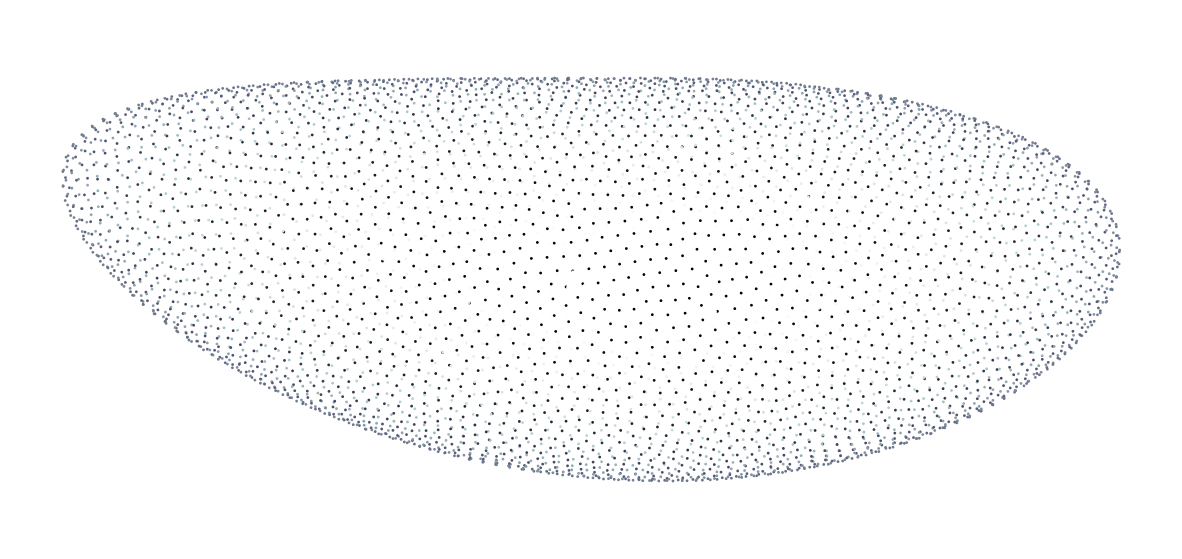

In [16]:
fig = plt.figure(figsize=(15, 7))
x, y, z = positions[0,:, 0], positions[0,:, 1], positions[0,:, 2]

dx = -x + positions[50, :,0]
dz = -z + positions[50, :,2]

dx = dx/np.linalg.norm([dx, dz], axis=0)
dz = dz/np.linalg.norm([dx, dz], axis=0)

angles = np.arctan2(dz, dx)

plt.scatter(x, z, s=4, cmap= "bone", alpha= 1, c = y / np.max(y) , marker='o', edgecolors='none')


# plt.quiver(x[y>0], z[y>0], dx[y>0], dz[y>0], scale=0.5, scale_units='xy', angles='xy', color='teal', alpha=1.)

# remove the axes
plt.axis('off')

plt.axis('equal')
# make background transparent
fig.patch.set_alpha(0.)
plt.savefig('../../Figures/frontpage.png', bbox_inches='tight', pad_inches=0, transparent=True)

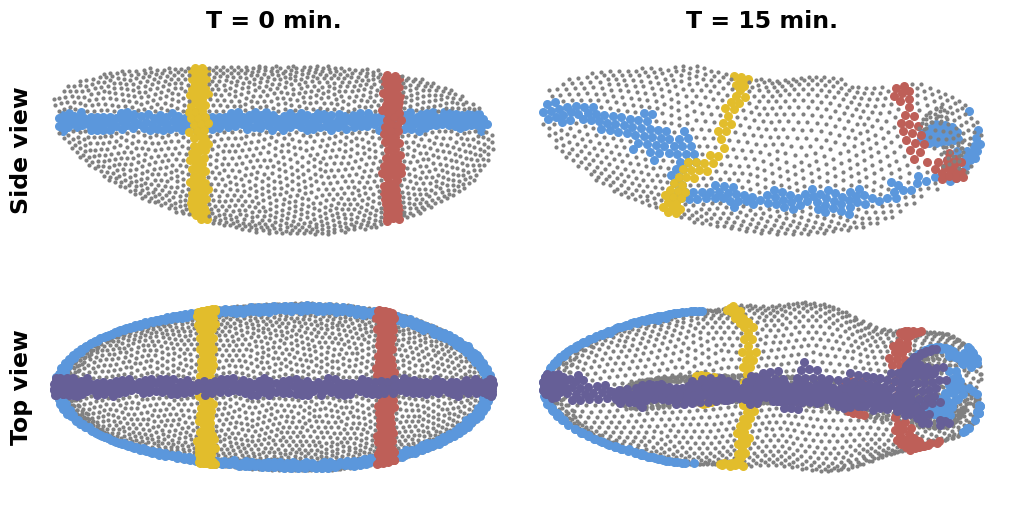

In [55]:
x = positions[0,:,0]
y = positions[0,:,1]
z = positions[0,:,2]

w = 5

p = 5
stripe1 = (z > p)*(z < p+w)
p = -30
stripe2 = (x>p)*(x<p+w)
p = 20
stripe3 = (x>p)*(x<p+w)
p = -2.5
stripe4 = (y>p)*(y<p+w)

all_stripes = stripe1 | stripe2 | stripe3 | stripe4
stripes_lst = [stripe1, stripe2, stripe3, stripe4]
colors = ['#5b97dc','#e2bd2c','#be5f58', "#665f97"]

fig, axs = plt.subplots(2,2, figsize=(10,5), constrained_layout=True)
axind = 0

upper_axs = axs[0,:]
lower_axs = axs[1,:]

for t in [0,3000]:
    y = positions[t,:,1]
    x = positions[t,:,0]
    z = positions[t,:,2]

    ycut = 8
    yc2 = 9
    # lateral view
    si = 0
    for c, stripe in zip(colors, stripes_lst):
        if si == 3:
            continue
        si +=1
        upper_axs[axind].scatter(x[stripe][y[stripe]>yc2], z[stripe][y[stripe]>yc2], c=c, s = 30)
    upper_axs[axind].scatter(x[~all_stripes][y[~all_stripes]>ycut], z[~all_stripes][y[~all_stripes]>ycut], c="grey", s = 4)

    # remove the ticks
    upper_axs[axind].axis('off')
    upper_axs[axind].axis('equal')

    # dorsal view
    zcut = 0
    lower_axs[axind].scatter(x[~all_stripes][z[~all_stripes]>zcut], y[~all_stripes][z[~all_stripes]>zcut], c="grey", s = 4)
    for c, stripe in zip(colors, stripes_lst):
        
        lower_axs[axind].scatter(x[stripe][z[stripe]>zcut], y[stripe][z[stripe]>zcut], c=c, s = 30)

    # remove the ticks
    lower_axs[axind].axis('off')
    lower_axs[axind].axis('equal')

    axind += 1


fs  = 17
upper_axs[0].annotate('Side view', (-0.05, 0.5), xycoords = 'axes fraction', rotation = 90, va = 'center', fontweight = 'bold', fontsize = fs)
lower_axs[0].annotate('Top view', (-0.05, 0.5), xycoords = 'axes fraction', rotation = 90, va = 'center', fontweight = 'bold', fontsize = fs)

for a, t in zip(upper_axs,["0 min.", "15 min."]):
    a.set_title('T = {}'.format(t),  fontweight = 'bold', fontsize = fs)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

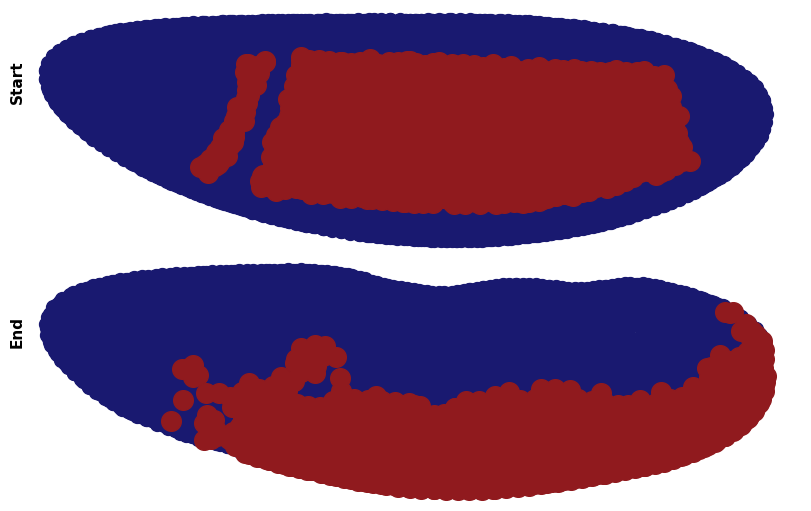

In [11]:
positions = np.load("../f_poss.npy")
properties = np.load("../f_properties.npy")


fig, axs = plt.subplots(2,1, figsize=(8,5), constrained_layout=True)

gb = properties == 1
axind = 0

for t in [0,-1]:
    y = positions[t,:,1]
    x = positions[t,:,0]
    z = positions[t,:,2]


    # lateral view
    axs[axind].scatter(x[~gb], z[~gb], c = "midnightblue", s = 100)
    axs[axind].scatter(x[gb], z[gb], c = "#901A1E", s = 200)

    axs[axind].axis('off')

    # axs[axind].set_title('Timestep {}'.format(t),  fontweight = 'bold', fontsize = 11)
    
    t = "Start" if t == 0 else "End"
    axs[axind].annotate(t, (0.00, 0.7), xycoords = 'axes fraction', rotation = 90, va = 'center', fontweight = 'bold', fontsize = 11)

    axind += 1

